# Quantifying Shakespeare

In this notebook we will find the frequencies with which Shakespeare's words used letters

In [23]:
from io import TextIOWrapper

def read_file(filename: str) -> list[str]:
    """Given the name of a file, return a list of its lines."""
    lines: list[str] = []
    file: TextIOWrapper = open(filename, "r", encoding="utf8")
    for line in file:
        line = line.strip()
        line = line.lower()
        if line != "":
            lines.append(line)
    return lines

shakespeare_lines: list[str] = read_file("./shakespeare.txt")
print(len(shakespeare_lines))
# print(shakespeare_lines[0:126])

12972


The next step our our analysis is to count the letters in the lines list one-by-one to find the frequency of use of each letter.

In [24]:
def tally(counts: dict[str, int], key: str) -> None:
    """Mutate counts to increment a key by 1 if it exists, or intialize to 1."""
    if key in counts:
        counts[key] += 1
    else:
        counts[key] = 1


def count_letters(lines: list[str]) -> dict[str,int]:
    """Count frequencies of all letters ina list of strings."""
    counts: dict[str,int] ={}
    for line in lines:
        for char in line:
            if char.isalpha():
                tally(counts, char)
    return counts

shakespeare_letters: dict[str, int] = count_letters(shakespeare_lines)
print(shakespeare_letters)

{'a': 5990, 'h': 1760, 'e': 6662, 'd': 2453, 'l': 3371, 'i': 3759, 'r': 4158, 'g': 1644, 't': 3295, 'b': 1627, 'c': 2028, 'k': 1505, 's': 6665, 'f': 1115, 'm': 1976, 'p': 2019, 'n': 2952, 'y': 2074, 'o': 4438, 'w': 1039, 'u': 2511, 'v': 694, 'z': 434, 'x': 288, 'j': 291, 'q': 112}


Let's create a visualization of this data with a bar chart.

In [25]:
items_in_dict: list[tuple[str,int]] = list(shakespeare_letters.items())
items_in_dict = sorted(items_in_dict)

sorted_letters: dict[str, int] = dict(items_in_dict)
print(sorted_letters)

{'a': 5990, 'b': 1627, 'c': 2028, 'd': 2453, 'e': 6662, 'f': 1115, 'g': 1644, 'h': 1760, 'i': 3759, 'j': 291, 'k': 1505, 'l': 3371, 'm': 1976, 'n': 2952, 'o': 4438, 'p': 2019, 'q': 112, 'r': 4158, 's': 6665, 't': 3295, 'u': 2511, 'v': 694, 'w': 1039, 'x': 288, 'y': 2074, 'z': 434}


<BarContainer object of 26 artists>

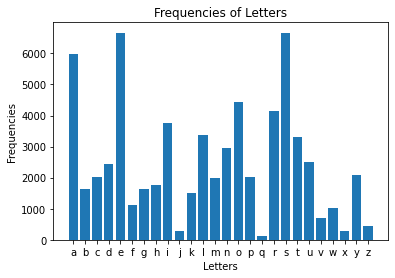

In [26]:
from matplotlib import pyplot

pyplot.title("Frequencies of Letters")
pyplot.xlabel("Letters")
pyplot.ylabel("Frequencies")
labels: list[str] = list(sorted_letters.keys())
values: list[int] = list(sorted_letters.values())
pyplot.bar(labels, values)